# Hourly Energy Consumption

## Step 1:

#### Import Library

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
%matplotlib inline

## Step 2:

#### Read the DataSet

In [6]:
df = pd.read_csv("AEP_hourly.csv")
df.head(3)


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
Datetime    121273 non-null object
AEP_MW      121273 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [8]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


## Step 3:

#### seperate date and time 

In [18]:
df["New_Date"] = pd.to_datetime(df["Datetime"]).dt.date
df["New_Time"] = pd.to_datetime(df["Datetime"]).dt.time

In [20]:
df1 = df
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


#  Step 4: 

###  When was the higest Energy Consumption and which Year 

#### Maximum 

In [21]:
df1[df1["AEP_MW"] == df["AEP_MW"].max()]

,Datetime,AEP_MW,New_Date,New_Time
30221,2008-10-20 14:00:00,25695.0,2008-10-20,14:00:00


#### Minimum

In [22]:
df1[df1["AEP_MW"] == df["AEP_MW"].min()]

,Datetime,AEP_MW,New_Date,New_Time
100759,2016-10-02 05:00:00,9581.0,2016-10-02,05:00:00


### Conclusion : From Step 4 we can say that Maximum Energy was Consumed during 2016-10-02	 at 05:00:00 and it was 9581.0 MW and Minimum was on 2008-10-20	 at 14:00:00 and was 25695.0 MW
 

# Step 5:

### Plot and  Data visualization 

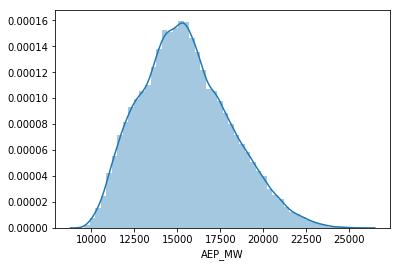

In [24]:
sns.distplot(df1["AEP_MW"])

# Step 7: Extract Date and Time 

In [36]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00


In [38]:
df1["Year"] = pd.DatetimeIndex(df['New_Date']).year

In [39]:
df1.head(2)

,Datetime,AEP_MW,New_Date,New_Time,Year
0,2004-12-31 01:00:00,13478.0,2004-12-31,01:00:00,2004
1,2004-12-31 02:00:00,12865.0,2004-12-31,02:00:00,2004


### Check how many Years are Unique

In [41]:
df1["Year"].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

#### This Tell us that there are 10 Unique Year from 2004 to 2018

In [43]:
df1[df1["Year"] == 2013].nunique()

Datetime    8758
AEP_MW      5601
New_Date     365
New_Time      24
Year           1
dtype: int64

## shows the Relationship of Energy vs Year

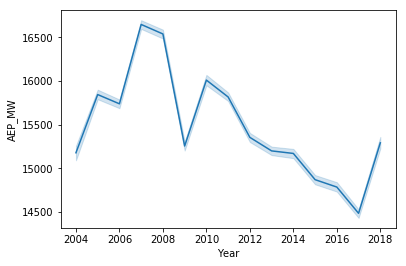

In [44]:
sns.lineplot(x=df1["Year"],y=df1["AEP_MW"], data=df1)

### Regression

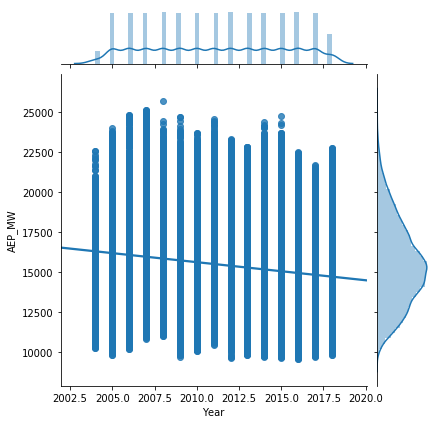

In [48]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
             kind="reg")

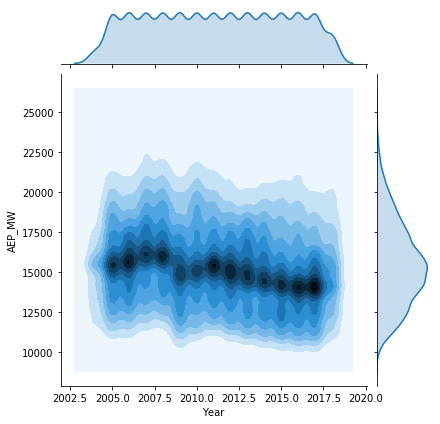

In [49]:
sns.jointplot(x=df1["Year"],
              y=df1["AEP_MW"],
              data=df1,
             kind="kde")

## Let us see the relation between Energy and Time

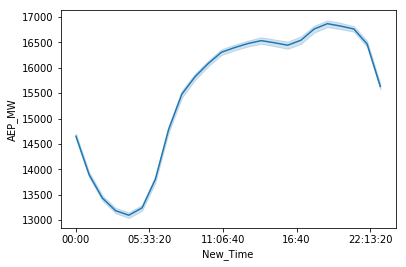

In [51]:
sns.lineplot(x=df1["New_Time"],y=df1["AEP_MW"], data=df1)